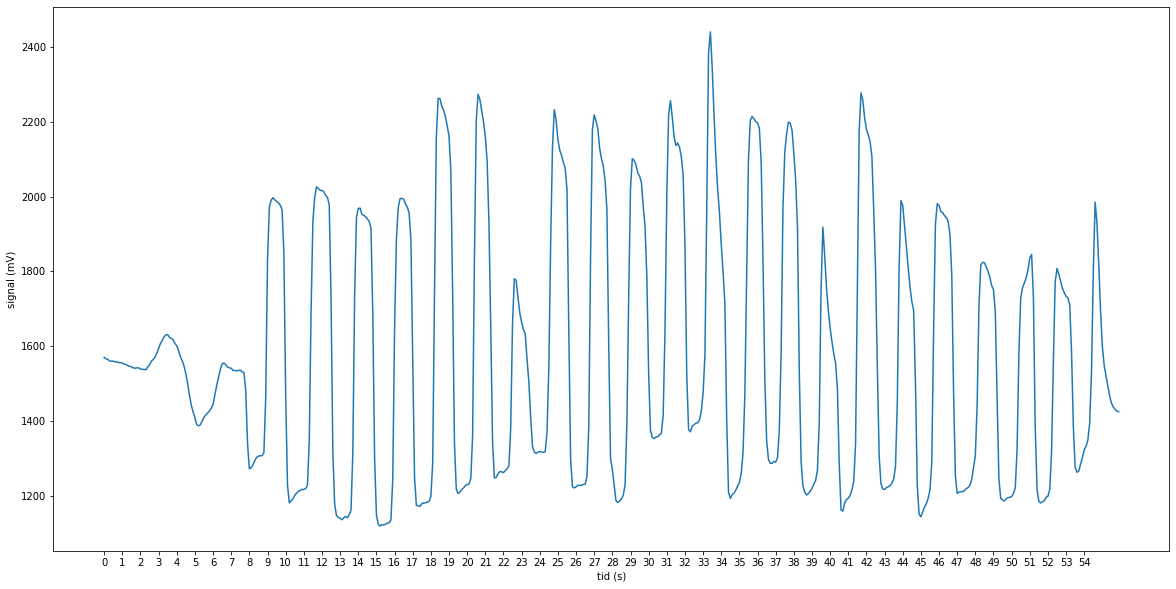

In [16]:
from pylab import *

data = loadtxt("sample.csv",delimiter=",")

tid = data[:,1]  # s
signal = data[:,2]  # mV (millivolt)

figure(figsize=(20,10))
xticks(range(int(min(tid)), int(max(tid))))

plot(tid, signal)
xlabel('tid (s)')
ylabel('signal (mV)')
show()

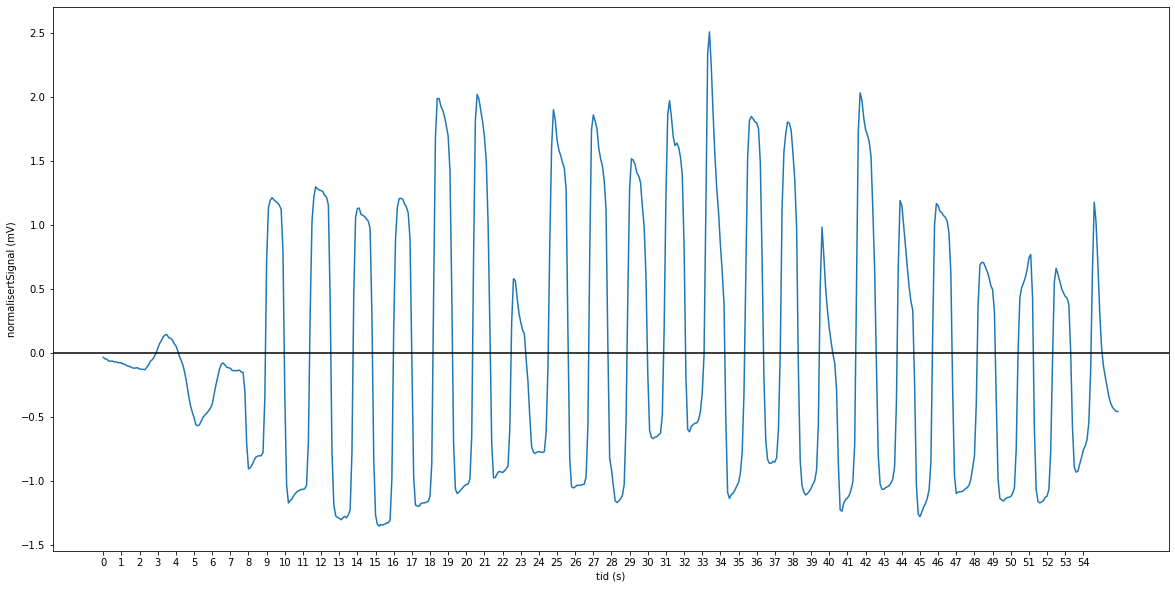

In [15]:
normalisertSignal = zeros(len(tid))

for i in range(len(tid)):
    normalisertSignal[i] = (signal[i]-mean(signal))/std(signal)
    

figure(figsize=(20,10))
xticks(range(int(min(tid)), int(max(tid))))
    
plot(tid, normalisertSignal)
xlabel('tid (s)')
ylabel('normalisertSignal (mV)')
axhline(y=0,color='black')
show()

In [19]:
# Definerer funksjoner fra de diskrete verdiene
def f(x):
    feilmargin = 0.0001
    funksjonsverdi = 0
    for i in range(len(tid)):
        if abs(tid[i]-x)<=feilmargin:
            funksjonsverdi=normalisertSignal[i]
    return funksjonsverdi

#Definerer den deriverte av pustedataene fra de diskrete verdiene
def Df(x):
    feilmargin = 0.0001
    funksjonsverdi = 0
    for i in range(len(tid)):
        if abs(tid[i]-x)<=feilmargin:
            funksjonsverdi=derivert_signal[i]
    return funksjonsverdi

In [38]:
def halveringsmetoden(f,a,b,tol=1E-10, N=10000):
    """
    Parameters
    ----------
    a : start intervall
    b : slutt intervall
    tol : nøyaktighet

    """
    m = (a+b)/2
    
    
    while abs(f(m)) > tol:
        if f(a)*f(m) < 0:
            b = m
        elif f(b)*f(m) < 0:
            a = m
        elif f(a) * f(b) > 0:
            return None
        m = (a+b)/2
        
    return m

nullpunkt = halveringsmetoden(f,2,3)

print(nullpunkt)

2.75


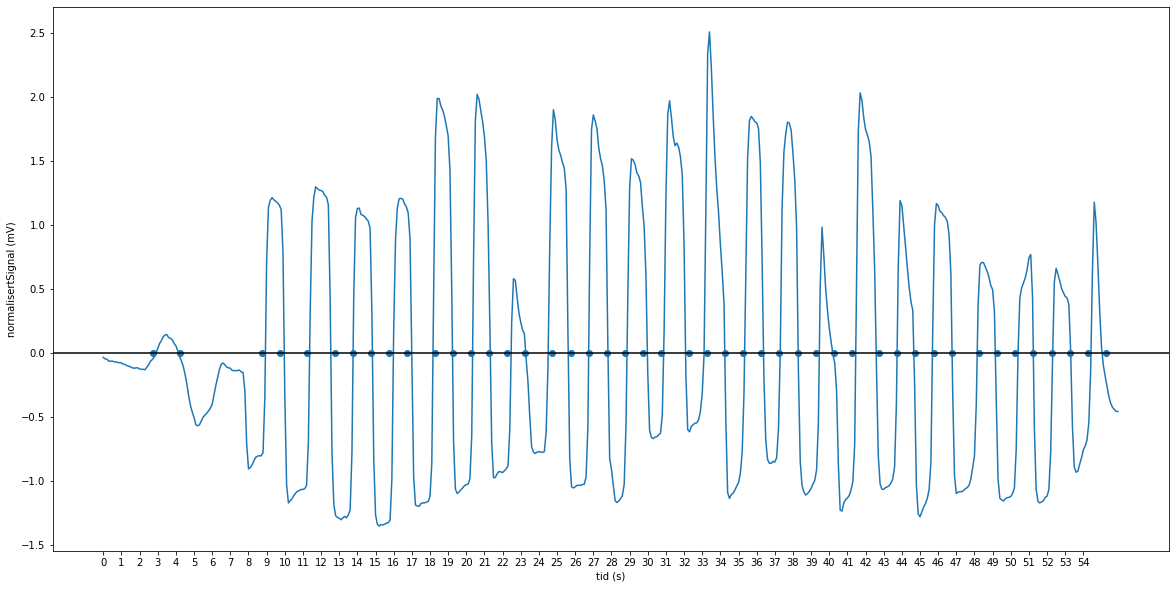

In [47]:
a = 0
b = 1

nullpunkter = []
y = zeros(int(max(tid))+1)

for k in range(0, int(max(tid))+1, 1):
    nullpunkt = halveringsmetoden(f,a,b)
    nullpunkter.append(nullpunkt)
    a += 1
    b += 1
    
figure(figsize=(20,10))
xticks(range(int(min(tid)), int(max(tid))))
    
plot(tid, normalisertSignal)
scatter(nullpunkter,y)
xlabel('tid (s)')
ylabel('normalisertSignal (mV)')
axhline(y=0,color='black')
show()
